In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df.shape)

(150, 5)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
print(df['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


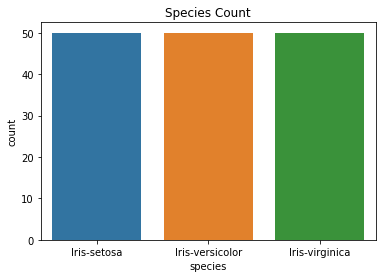

In [9]:
plt.title('Species Count')
sns.countplot(x = df['species'], data = df)
plt.show()

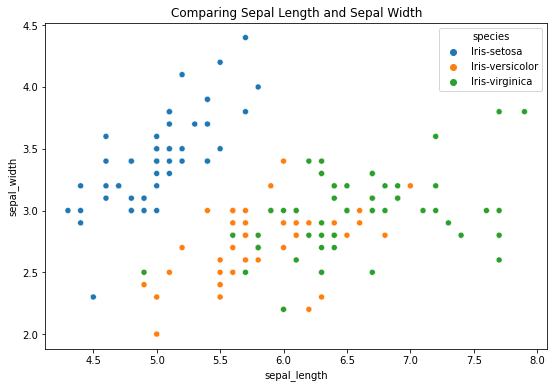

In [12]:
plt.figure(figsize = (9, 6))
plt.title('Comparing Sepal Length and Sepal Width')
sns.scatterplot(x = df['sepal_length'],y = df['sepal_width'], hue = df['species'],)
plt.show()

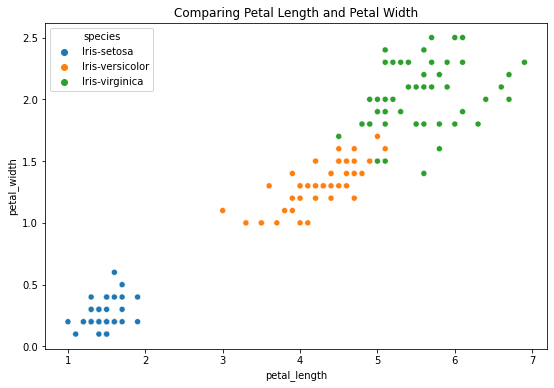

In [13]:
plt.figure(figsize = (9, 6))
plt.title('Comparing Petal Length and Petal Width')
sns.scatterplot(x = df['petal_length'],y = df['petal_width'], hue = df['species'],)
plt.show()

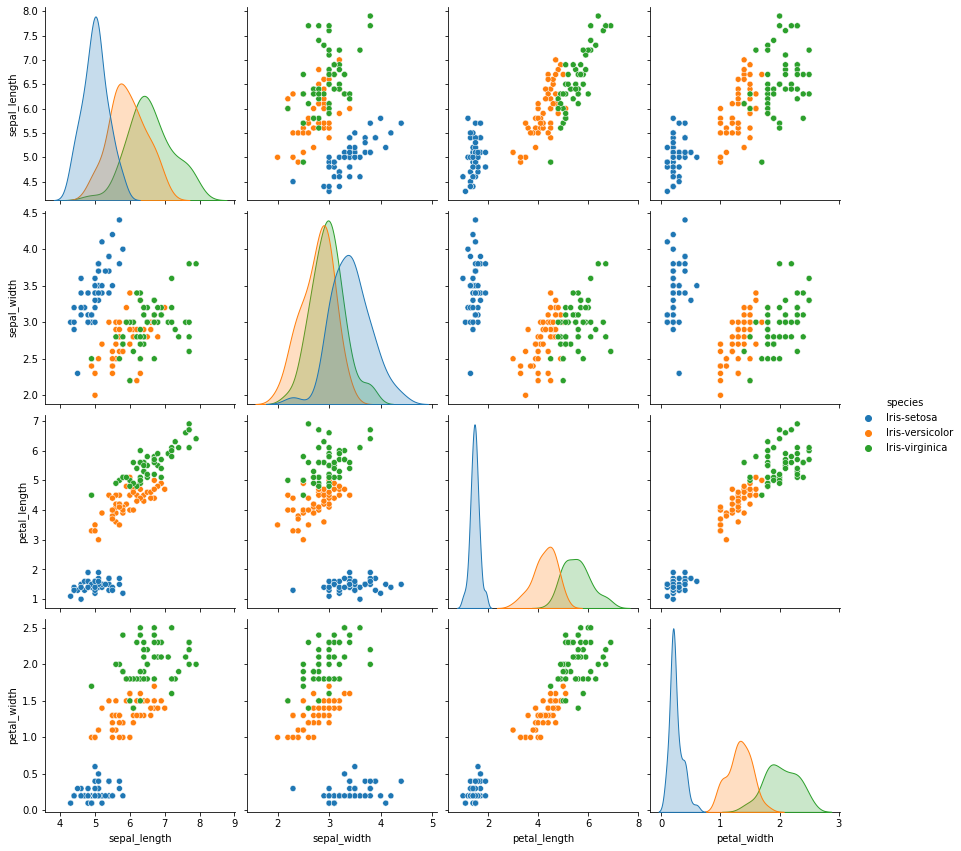

In [16]:
sns.pairplot(df, hue = 'species', height = 3)

[]

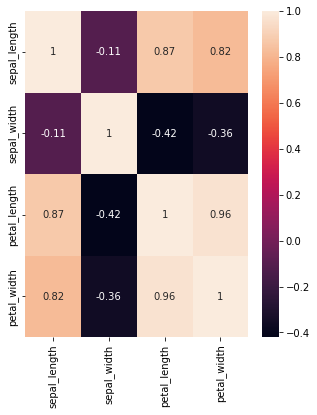

In [17]:
plt.figure(figsize = (5,6))
sns.heatmap(df.corr(), annot = True)
plt.plot()

In [18]:
X = df.drop(["species"], axis = 1)
Y = df['species']
print(X.shape, Y.shape)

(150, 4) (150,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [20]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [21]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [22]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
y_pred_logistic = model_logistic.predict(x_test)
print("The accuracy of the Logistic Regressor is ", accuracy_score(y_test, y_pred_logistic)*100, "%")

The accuracy of the Logistic Regressor is  100.0 %


In [23]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(x_train, y_train)
y_pred_SVC = model_SVC.predict(x_test)
print("The accuracy of the Support Vector Classifier is ", accuracy_score(y_test, y_pred_SVC)*100, "%")

The accuracy of the Support Vector Classifier is  100.0 %
